In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
total_result = dict() # to store the result of diferent approaches 

Data Preparation

In [4]:
x_train = pd.read_csv('smoking data/competition_format/x_train.csv')
y_train = pd.read_csv('smoking data/competition_format/y_train.csv')['smoking']
x_test = pd.read_csv('smoking data/competition_format/x_test.csv')
y_test= pd.read_csv('smoking data/competition_format/y_test.csv')['smoking'].squeeze()
x_train, x_valid, y_train, y_valid = train_test_split(
                                                    x_train, 
                                                    y_train,
                                                    test_size = 0.25,
                                                    random_state = 8) 

all_data = (x_train, x_test, x_valid, y_train, y_test, y_valid)

In [5]:
# some functions 
from sklearn import preprocessing

def calculate_acc(y_pred, y_test):
      return np.mean(y_pred == y_test)


le = preprocessing.LabelEncoder()
def labalize(data):
    try:
        for column_name in data.columns:
            if data[column_name].dtype == object:
                data[column_name] = le.fit_transform(data[column_name])
            else:
                pass
    except:
        pass
[labalize(d) for d in all_data]
    


[None, None, None, None, None, None]

In [4]:
x_test

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,8,1,80,160,65,91.0,0.9,0.7,1.0,1.0,...,94.0,14.5,1.0,1.0,29.0,19.0,39.0,0,0.0,0
1,17,1,30,165,90,98.0,1.5,1.5,1.0,1.0,...,165.0,15.6,1.0,0.9,20.0,37.0,34.0,0,0.0,0
2,20,1,40,170,75,81.0,1.5,1.5,1.0,1.0,...,98.0,16.4,1.0,0.7,25.0,32.0,73.0,0,0.0,0
3,24,1,35,175,70,80.0,1.0,1.0,1.0,1.0,...,160.0,15.3,1.0,0.7,30.0,55.0,50.0,0,0.0,0
4,25,1,35,160,75,93.0,1.0,1.2,1.0,1.0,...,132.0,14.7,1.0,1.1,35.0,58.0,56.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,55676,0,40,170,65,75.0,0.9,0.9,1.0,1.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,0,1.0,1
11135,55681,0,45,160,50,70.0,1.2,1.2,1.0,1.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0.0,1
11136,55683,0,55,160,50,68.5,1.0,1.2,1.0,1.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0.0,0
11137,55684,1,60,165,60,78.0,0.8,1.0,1.0,1.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0.0,0


#1 Desicion Tree

In [180]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
data_to_predict = (x_valid, y_valid) # for avoiding confusion
y_pred = clf.predict(x_valid)
print(f"Default DecisionTreeClassifier accuracy: {calculate_acc(y_pred, y_valid )*100:.2f}%")


Default DecisionTreeClassifier accuracy: 67.70%


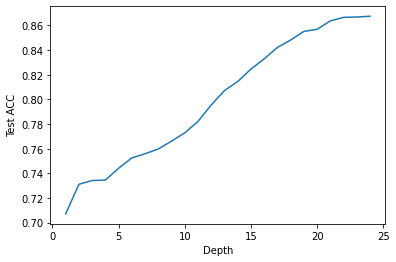

In [190]:

# hyperparameter tuning
depths = range(1 , 25)
depth_mae = dict()
for depth in depths:
  clf = DecisionTreeClassifier(max_depth = depth)
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  acc = calculate_acc(y_pred, y_test)
  depth_mae[depth] = acc
plt.plot(list(depth_mae.keys()), list(depth_mae.values()))
plt.xlabel('Depth')
plt.ylabel('Test ACC')
total_result['decision_tree'] = max(list(depth_mae.values()))

#2 KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)
print(f"Accuracy on test set: {knn_model.score(x_test, y_test)*100:.2f}%")


Accuracy on test set: 60.53%


100%|██████████| 20/20 [03:59<00:00, 11.98s/it]


Optimum k: 26


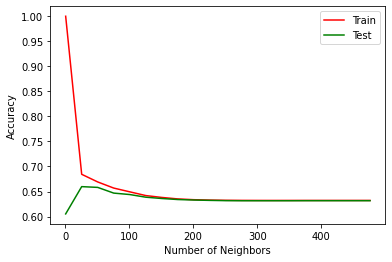

In [8]:
# Tuning hyperparameter k
acc_train = []
acc_test = []
k_range = range(1, 200, 5)
for k in tqdm(k_range):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(x_train, y_train)
  acc_test.append(knn_model.score(x_test, y_test))
  acc_train.append(knn_model.score(x_train, y_train))
  # print(f"k={k} - test acc={acc_test[-1]*100:0.2f}% - train acc={acc_train[-1]*100:0.2f}%")
plt.plot(k_range, acc_train, 'r')
plt.plot(k_range, acc_test, 'g')
plt.legend(['Train', 'Test'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

total_result['knn'] = k_range[np.argmax(acc_test)]
print(f"Optimum k: {k_range[np.argmax(acc_test)]}")


#2 Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(x_train)
scaled_X_test = scaler.fit_transform(x_test)



In [ ]:
# classification
for c in range(1,5):
  tic = time.time()
  clf = LogisticRegression(C= c )
  clf.fit(x_train, y_train)
  toc = time.time()
  print(f"Elappsed time for training: {toc-tic:.4f}s")
  print(f"Accuracy on test data: {clf.score(x_test, y_test)*100:.2f}%")

# print(f"Coeff: {clf.coef_}")


#3 SVM

In [9]:
from sklearn.svm import SVC
c_arr = [0.001, 0.01, 0.1, 1, 10, 1e2, 1e3, 1e4, 1e5, 1e6]
train_acc = []
test_acc = []
hyperpara = {}
for C in tqdm(c_arr):
    svc = SVC(C=C)
    svc.fit(x_train, y_train)

    # train_acc.append(svc.score(x_valid, y_valid))
    score = svc.score(x_valid, y_valid)
    type(score)
    test_acc.append(score)
    hyperpara[C] = score
total_result['SVM'] = max(test_acc)
    # plot_desicion_boundary(X, y, svc, title=f"C={C}")

 10%|█         | 1/10 [03:00<27:06, 180.71s/it]

In [ ]:
# plot for hyper parametter accuracy 
plt.plot(np.log10(c_arr), train_acc, 'r')
plt.plot(np.log10(c_arr), test_acc, 'b')
plt.legend(['Train', 'Test'])
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.show()

#4 Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
total_true = (y_test != y_pred).sum()
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test.shape[0], ))

total_result['Naive_Bayes'] =  total_true/ x_test.shape[0] * 100

Number of mislabeled points out of a total 11139 points : 3272
